In [3]:
from sklearn.linear_model import LinearRegression

import os 
import seaborn as sns
import matplotlib.pyplot as plt

import wrangle as w
import explore as e
import viz


###### As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

# Acquiring Data from Zillow

In [4]:
df = w.sql_query_zillow()

In [5]:
df.head() # sample of DataFrame

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,3.0,2.0,1710.0,475000.0,1966.0,6344.67,6037.0
1,1,3.0,2.0,1263.0,408200.0,1977.0,5529.20,6037.0
2,2,3.0,3.0,2207.0,683385.0,1975.0,8426.50,6037.0
3,3,4.0,3.0,2732.0,740116.0,1970.0,9135.51,6037.0
4,4,4.0,3.0,2712.0,803000.0,1976.0,9717.48,6037.0


In [6]:
df.columns

Index(['Unnamed: 0', 'bedroomcnt', 'bathroomcnt',
       'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt',
       'taxamount', 'fips'],
      dtype='object')

###### Columns only showing bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fibs

In [7]:
df = w.clean_zillow(df)

In [8]:
train, validate, test= w.train_validate_test(df)

In [9]:
x_train, y_train, x_validate, y_validate, x_test, y_test = w.xy_formula(train, validate, test)

In [10]:
df.head()

,bedrooms,bathrooms,sqft,taxdollars,year,taxes,fips
0,3.0,2.0,1710.0,475000.0,1966.0,6344.67,6037.0
1,3.0,2.0,1263.0,408200.0,1977.0,5529.20,6037.0
2,3.0,3.0,2207.0,683385.0,1975.0,8426.50,6037.0
3,4.0,3.0,2732.0,740116.0,1970.0,9135.51,6037.0
4,4.0,3.0,2712.0,803000.0,1976.0,9717.48,6037.0


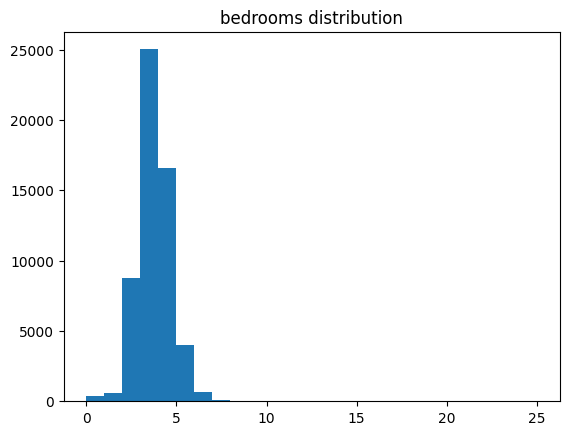

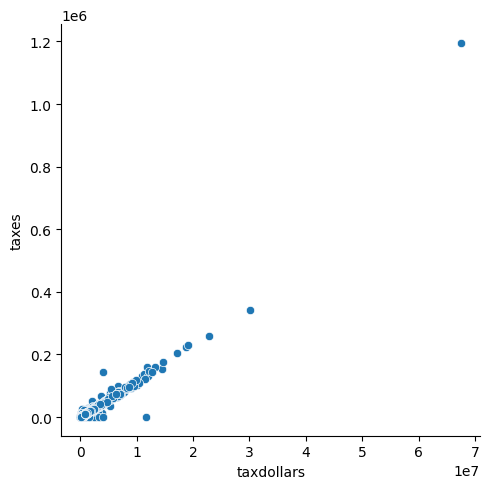

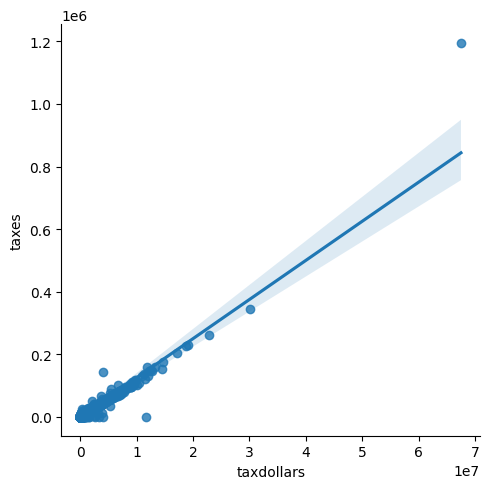

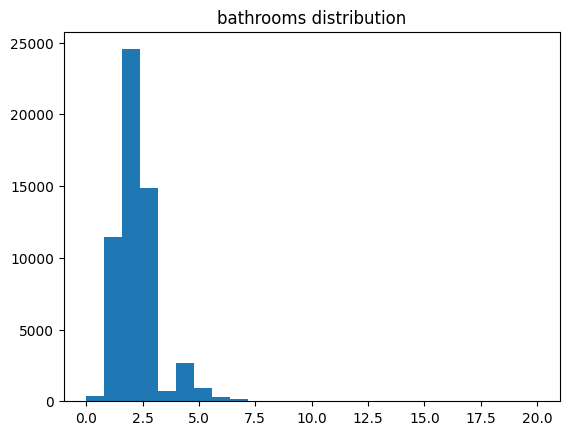

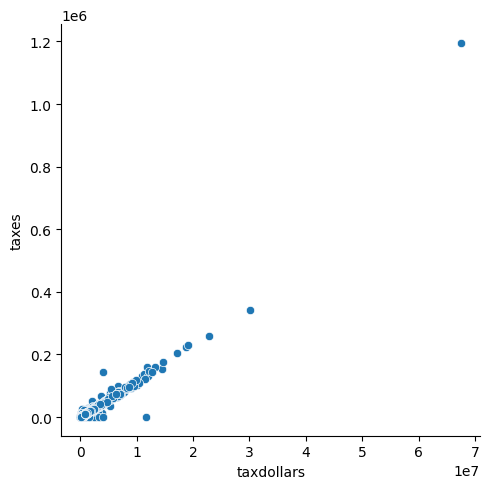

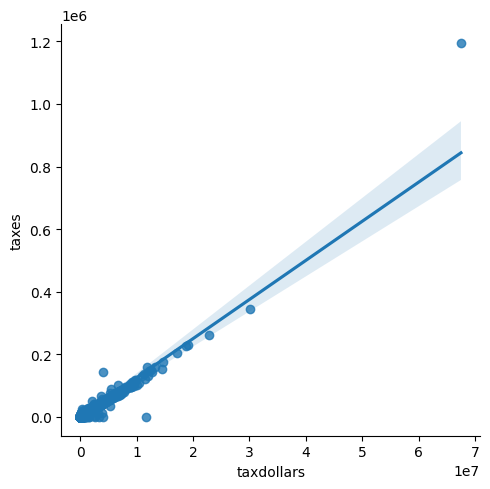

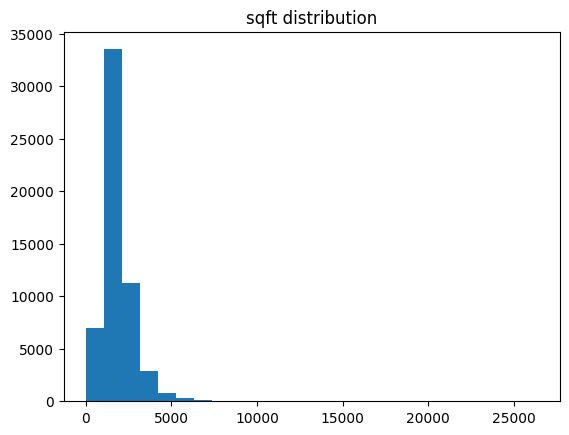

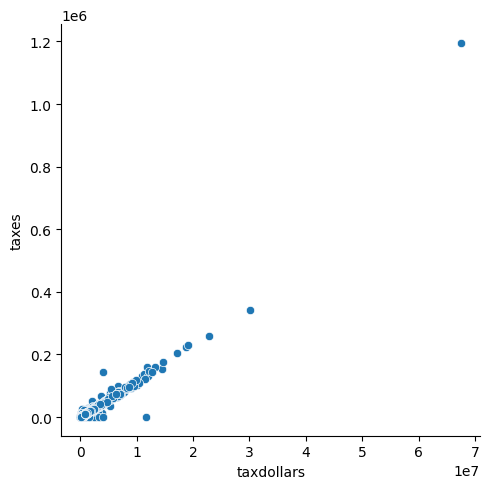

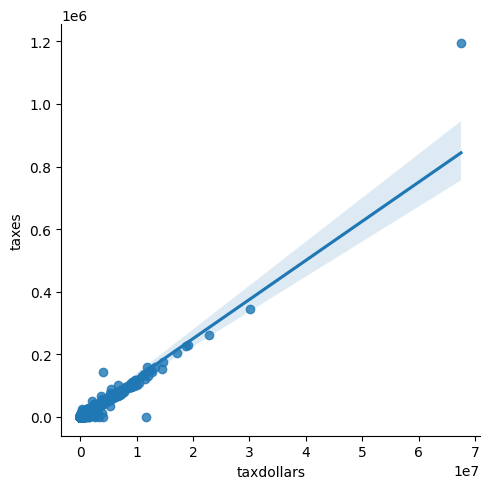

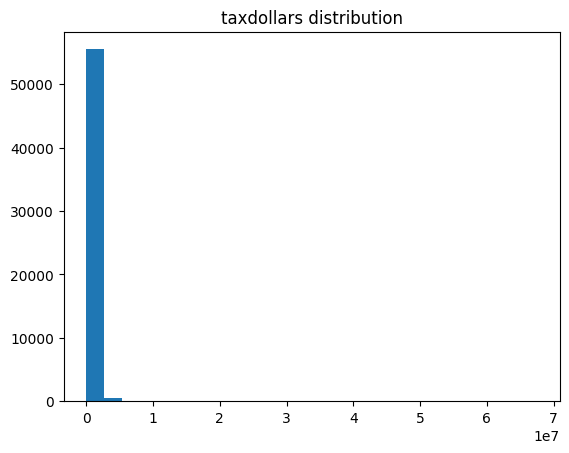

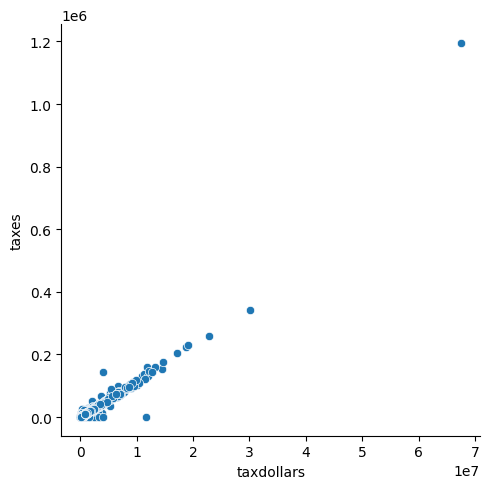

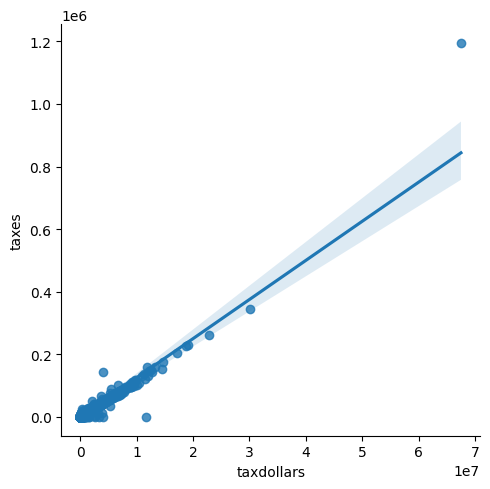

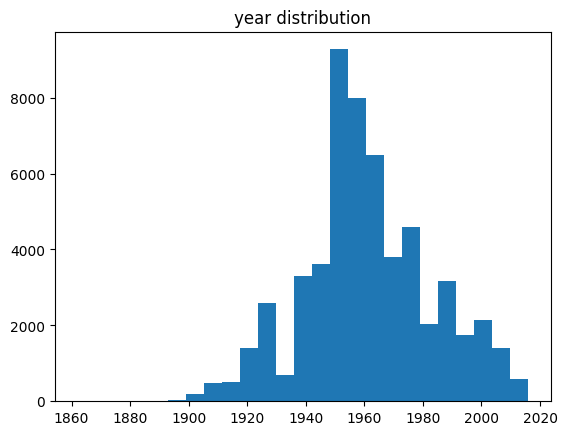

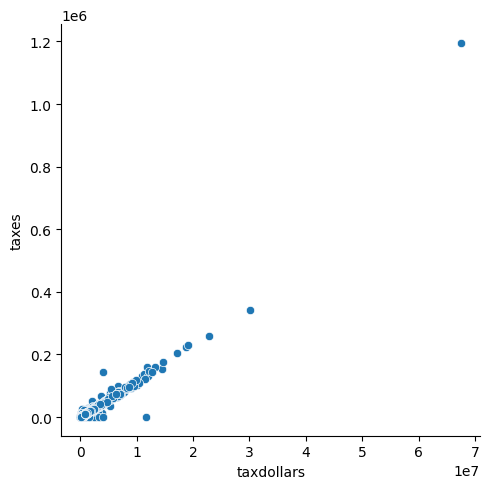

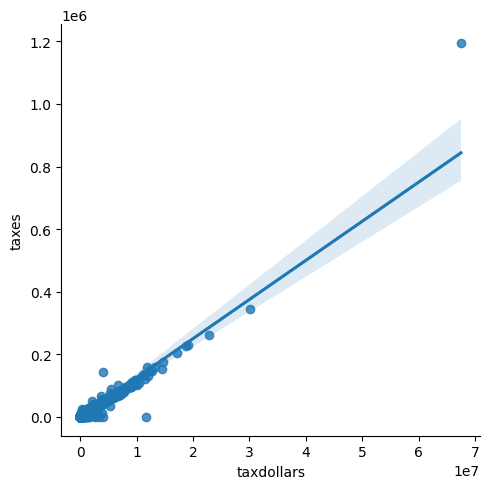

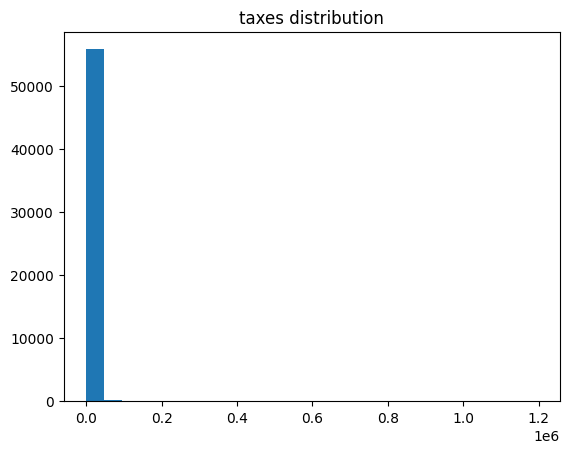

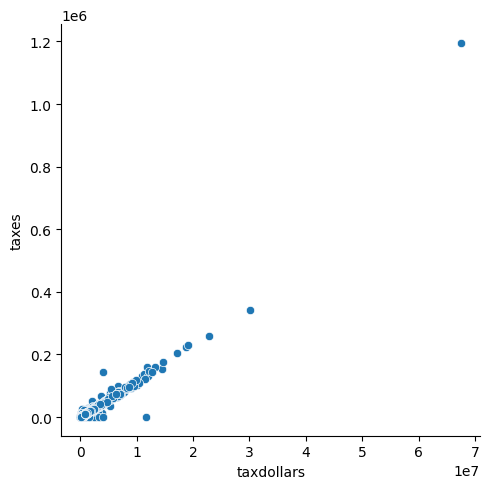

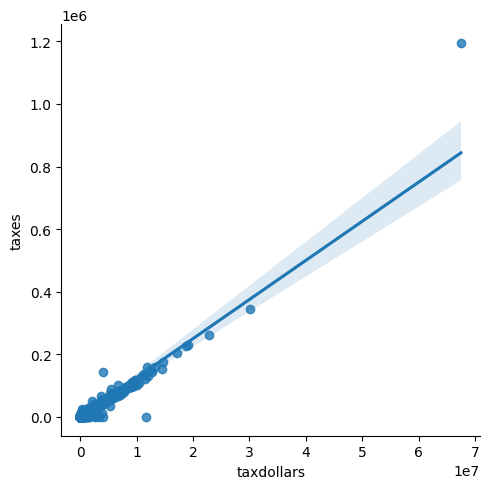

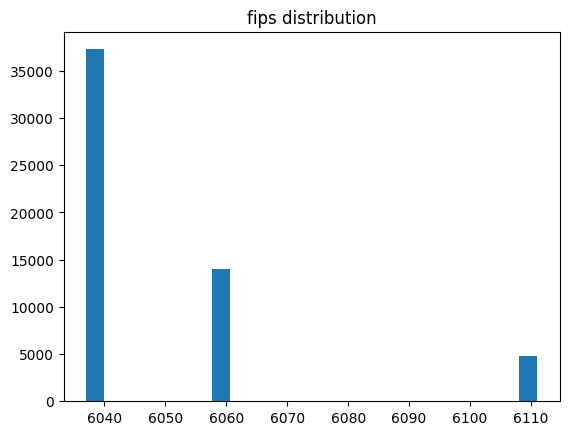

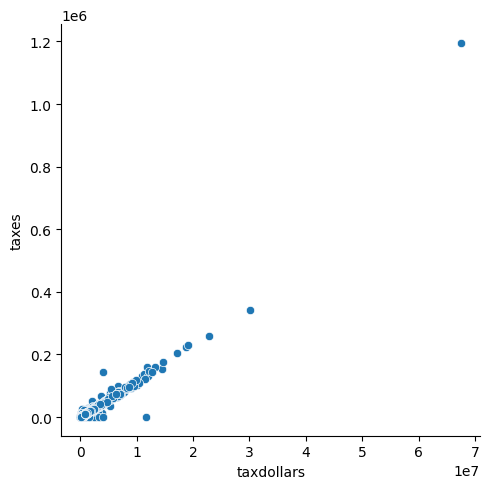

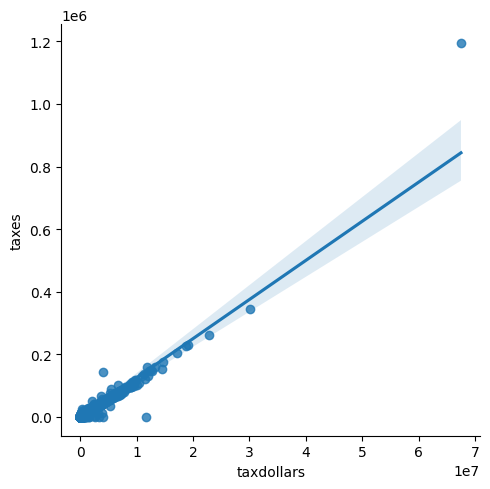

In [11]:
w.plot_variable_pairs(df)

In [13]:
df['sqft_baseline'] = df['sqft'].mean()

In [15]:
ols_model = LinearRegression().fit(df[['homevalue']], df.sqft)

In [16]:
df['sqft_hat'] = ols_model.predict(df[['homevalue']])

In [17]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [34]:
scaler.fit(x_train.values)

MinMaxScaler()

In [35]:
x_train_scaled = scaler.transform(x_train.values)

In [31]:
x_validate_scaled = scaler.transform(x_validate)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [32]:
x_test_scaled = scaler.transform(x_test)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Scaled')

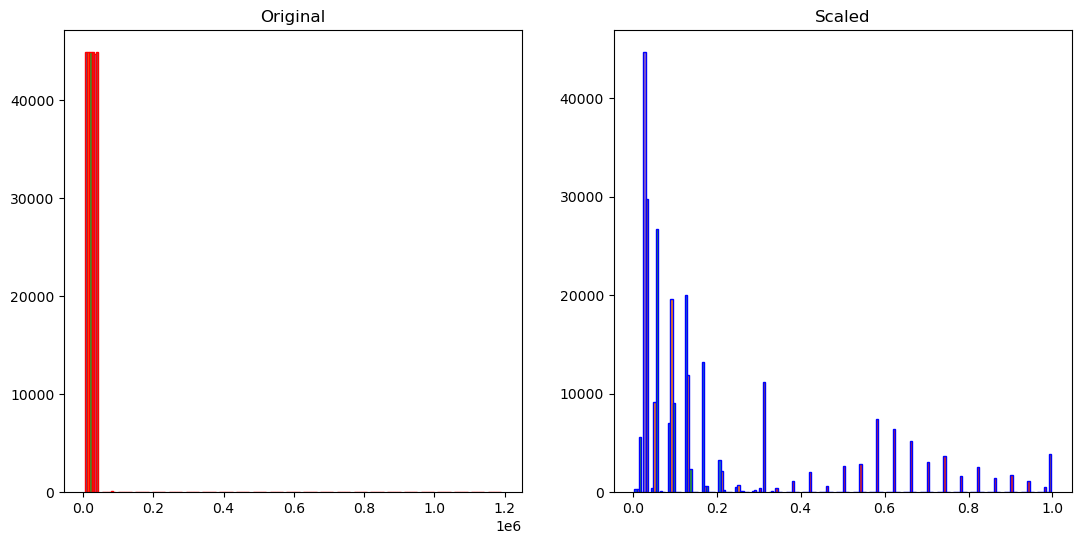

In [36]:
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='red')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='blue')
plt.title('Scaled')